In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd
import math
from scipy.constants import N_A, Boltzmann 

In [401]:
print(N_A, Boltzmann)

6.022140857e+23 1.38064852e-23


In [454]:
Vw = 18.91/1000
V = 18.91
delta_C = 2.28
T = 300
pressure = [100,150,200,250,300]
delta_p = np.asarray(pressure)

In [468]:
Permeation_const = ((-Vw*delta_C)+(V/(N_A*Boltzmann*T))*delta_p)
p1 = (-Vw*delta_C)
print(p1)
p2 = V/(N_A*Boltzmann*T)*delta_p
print(p2)
# Permeation_const = ((-Vw*delta_C)+(Vw/(N_A*Boltzmann*T))*delta_p)

-0.043114799999999995
[0.758117   1.13717549 1.51623399 1.89529249 2.27435099]


In [469]:
print(Permeation_const)

[0.7150022  1.09406069 1.47311919 1.85217769 2.23123619]


In [470]:
50/Permeation_const

array([69.92985515, 45.70130366, 33.94158482, 26.99525012, 22.4091023 ])

In [25]:
file1 = 'flux_rej_phos.csv'
file2 = 'flux_rej_gra.csv'

In [34]:
def load_csv(filename):
    df = pd.read_csv(filename, header = 0, usecols = [10, 11])
    data = df.as_matrix()
    # The fisrt row is column header, remove it
    # Convert the char numpy array to float numpy array
    data = (data[1:,:]).astype(np.float)
    data = data.reshape((5,5,2))
    return data;

In [35]:
phos = load_csv(file1)
gra = load_csv(file2)

In [281]:
material_list = ['Phosphorene','Graphene']
data_list = [phos,gra]
#Initialize rejection plot legend list
rej_legend =['o',',','^','+','>','x','*','p']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
area_list = [47, 67, 87]
flux_area_list = [47, 57, 67]

In [340]:
def plot_flux(data, area, material):
    area = str(area)
    area_dict = {'47': 0,
                 '57': 1,
                 '67': 2,
                 '77': 3,
                 '87': 4}
    area_index = area_dict[area]
    flux = data[area_index][:,0]
    legend_label = r"%s %s$\AA^2$"%(material, str(area))
    
    plt.plot(pressure, flux, linewidth = 0.7, label = legend_label)
    plt.scatter(pressure,flux, s = 10, label = None)
    return

In [341]:
def flux(material_list, data_list, area_list):
    # Check if both list has same length
    if(len(material_list) != len(data_list)):
        print('Material list and data list have different length!')
        return
    plt.figure(figsize = [4, 3], dpi = 600)
    Num = len(material_list)
    for area in area_list:
        for i in range(Num):
            plot_flux(data_list[i], area, material_list[i])
    plt.legend(loc='upper left', fontsize = 5, frameon = False)
    plt.axis([80,320,0,200])
    plt.tick_params(direction = 'in')
    plt.ylabel(r'Water flux (# ns$^{-1}$)', fontsize = 10)
    plt.xlabel('Pressure (MPa)', fontsize = 10)
    plt.title('Flux vs. Pressure',fontsize = 10)
#     plt.savefig('Flux_%sA.jpg' %str(area), bbox_inches = 'tight')
    plt.savefig('Flux.jpg', bbox_inches = 'tight')
    return

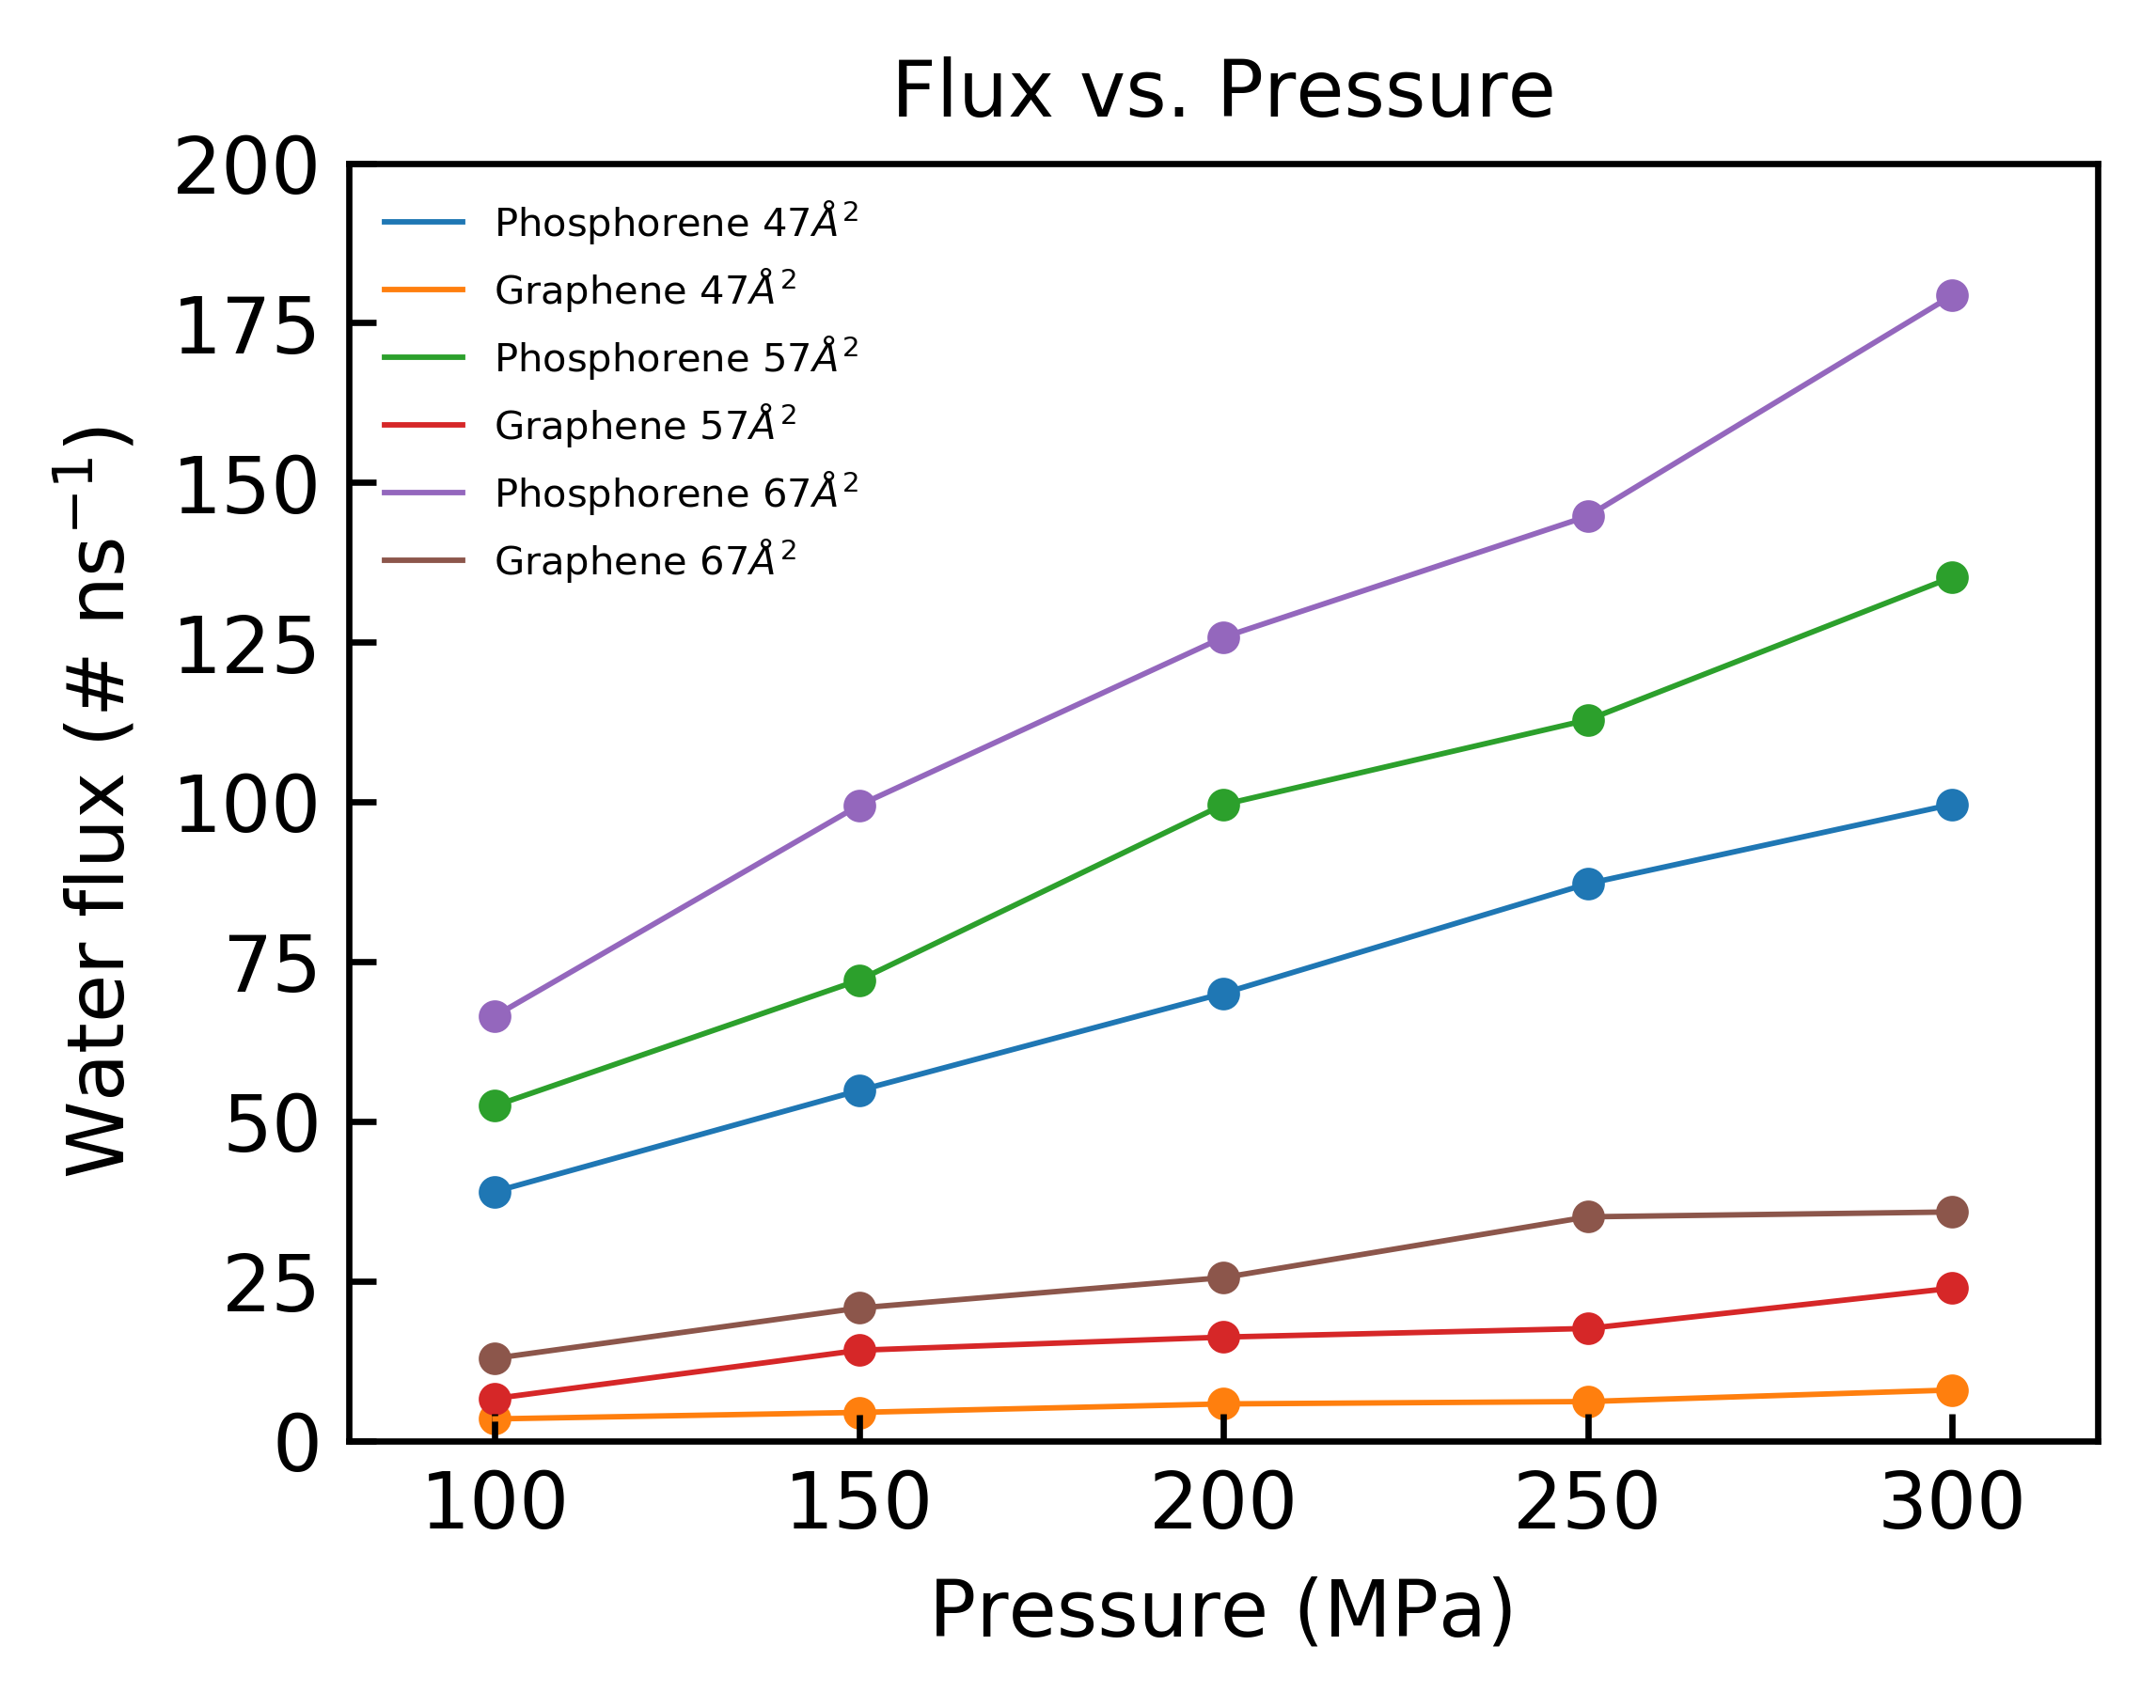

In [342]:
flux(material_list,data_list, flux_area_list)

In [290]:
def random_color_style():
    style = rej_legend[rd.randint(0,8)]
    color = colors[rd.randint(0,7)]
    if style == 'x' or style == '+':
        filled = 1
    else:
        filled = rd.randint(0,2)
    return [style, color, filled]

def rand_features(Num_plots):
    feature_map = []
    while(len(feature_map)<Num_plots):
        rand = random_color_style()
        if rand not in feature_map:
            feature_map.append(rand)
    return feature_map

In [343]:
def plot_rej(data, area, material, feature):
    area = str(area)
    area_dict = {'47': 0,
                 '57': 1,
                 '67': 2,
                 '77': 3,
                 '87': 4}
    area_index = area_dict[area]
    rej = data[area_index][:,1]
    
    #Unwrap the feautures
    style = feature[0]
    color = feature[1]
    filled = feature[2]
    size = 60
    line = 0.5
    
    print('style: %s, color: %s, filled: %d' %(style, color, filled))
    legend_label = r"%s %s$\AA^2$"%(material, str(area))    
    if filled == 0:
        plt.scatter(pressure,rej, marker = style, facecolors ='none', 
                        edgecolors=color, label = legend_label, zorder = 2, 
                        s = size, linewidth = line)
    else:
        plt.scatter(pressure,rej, marker = style, c=color, label = legend_label, 
                        zorder = 2, s=size, linewidth = line)
        
    plt.plot(pressure, rej, linewidth = 0.5,c = 'k', 
                 label = None, zorder = 1)

In [344]:
def rejection(material_list, data_list, area_list):
    # Check if both list has same length
    if(len(material_list) != len(data_list)):
        print('Material list and data list have different length!')
        return
    #Create figure
    plt.figure(figsize = [4, 3], dpi = 600)
    #Number of materials
    Num = len(material_list)
    #Number of plots
    Num_plots = Num*len(area_list)
    #Make random feature maps
    features = rand_features(Num_plots)
    
    for area_count,area in enumerate(area_list):
        for i in range(Num):
            plot_rej(data_list[i], area, material_list[i], features[area_count*Num+i])
    plt.legend(frameon = False, loc = 'lower left', fontsize = 5)
    plt.axis([80,320,50,105])
    plt.tick_params(direction = 'in')
    plt.ylabel('Ion rejection rate (%)', fontsize = 10)
    plt.xlabel('Pressure (MPa)', fontsize = 10)
    plt.title('Ion rejection rate vs. Pressure',fontsize = 10)
    plt.savefig('Rejection_rate.jpg', bbox_inches = 'tight')
    return

style: +, color: m, filled: 1
style: p, color: r, filled: 1
style: o, color: g, filled: 0
style: *, color: y, filled: 0
style: *, color: m, filled: 1
style: x, color: m, filled: 1


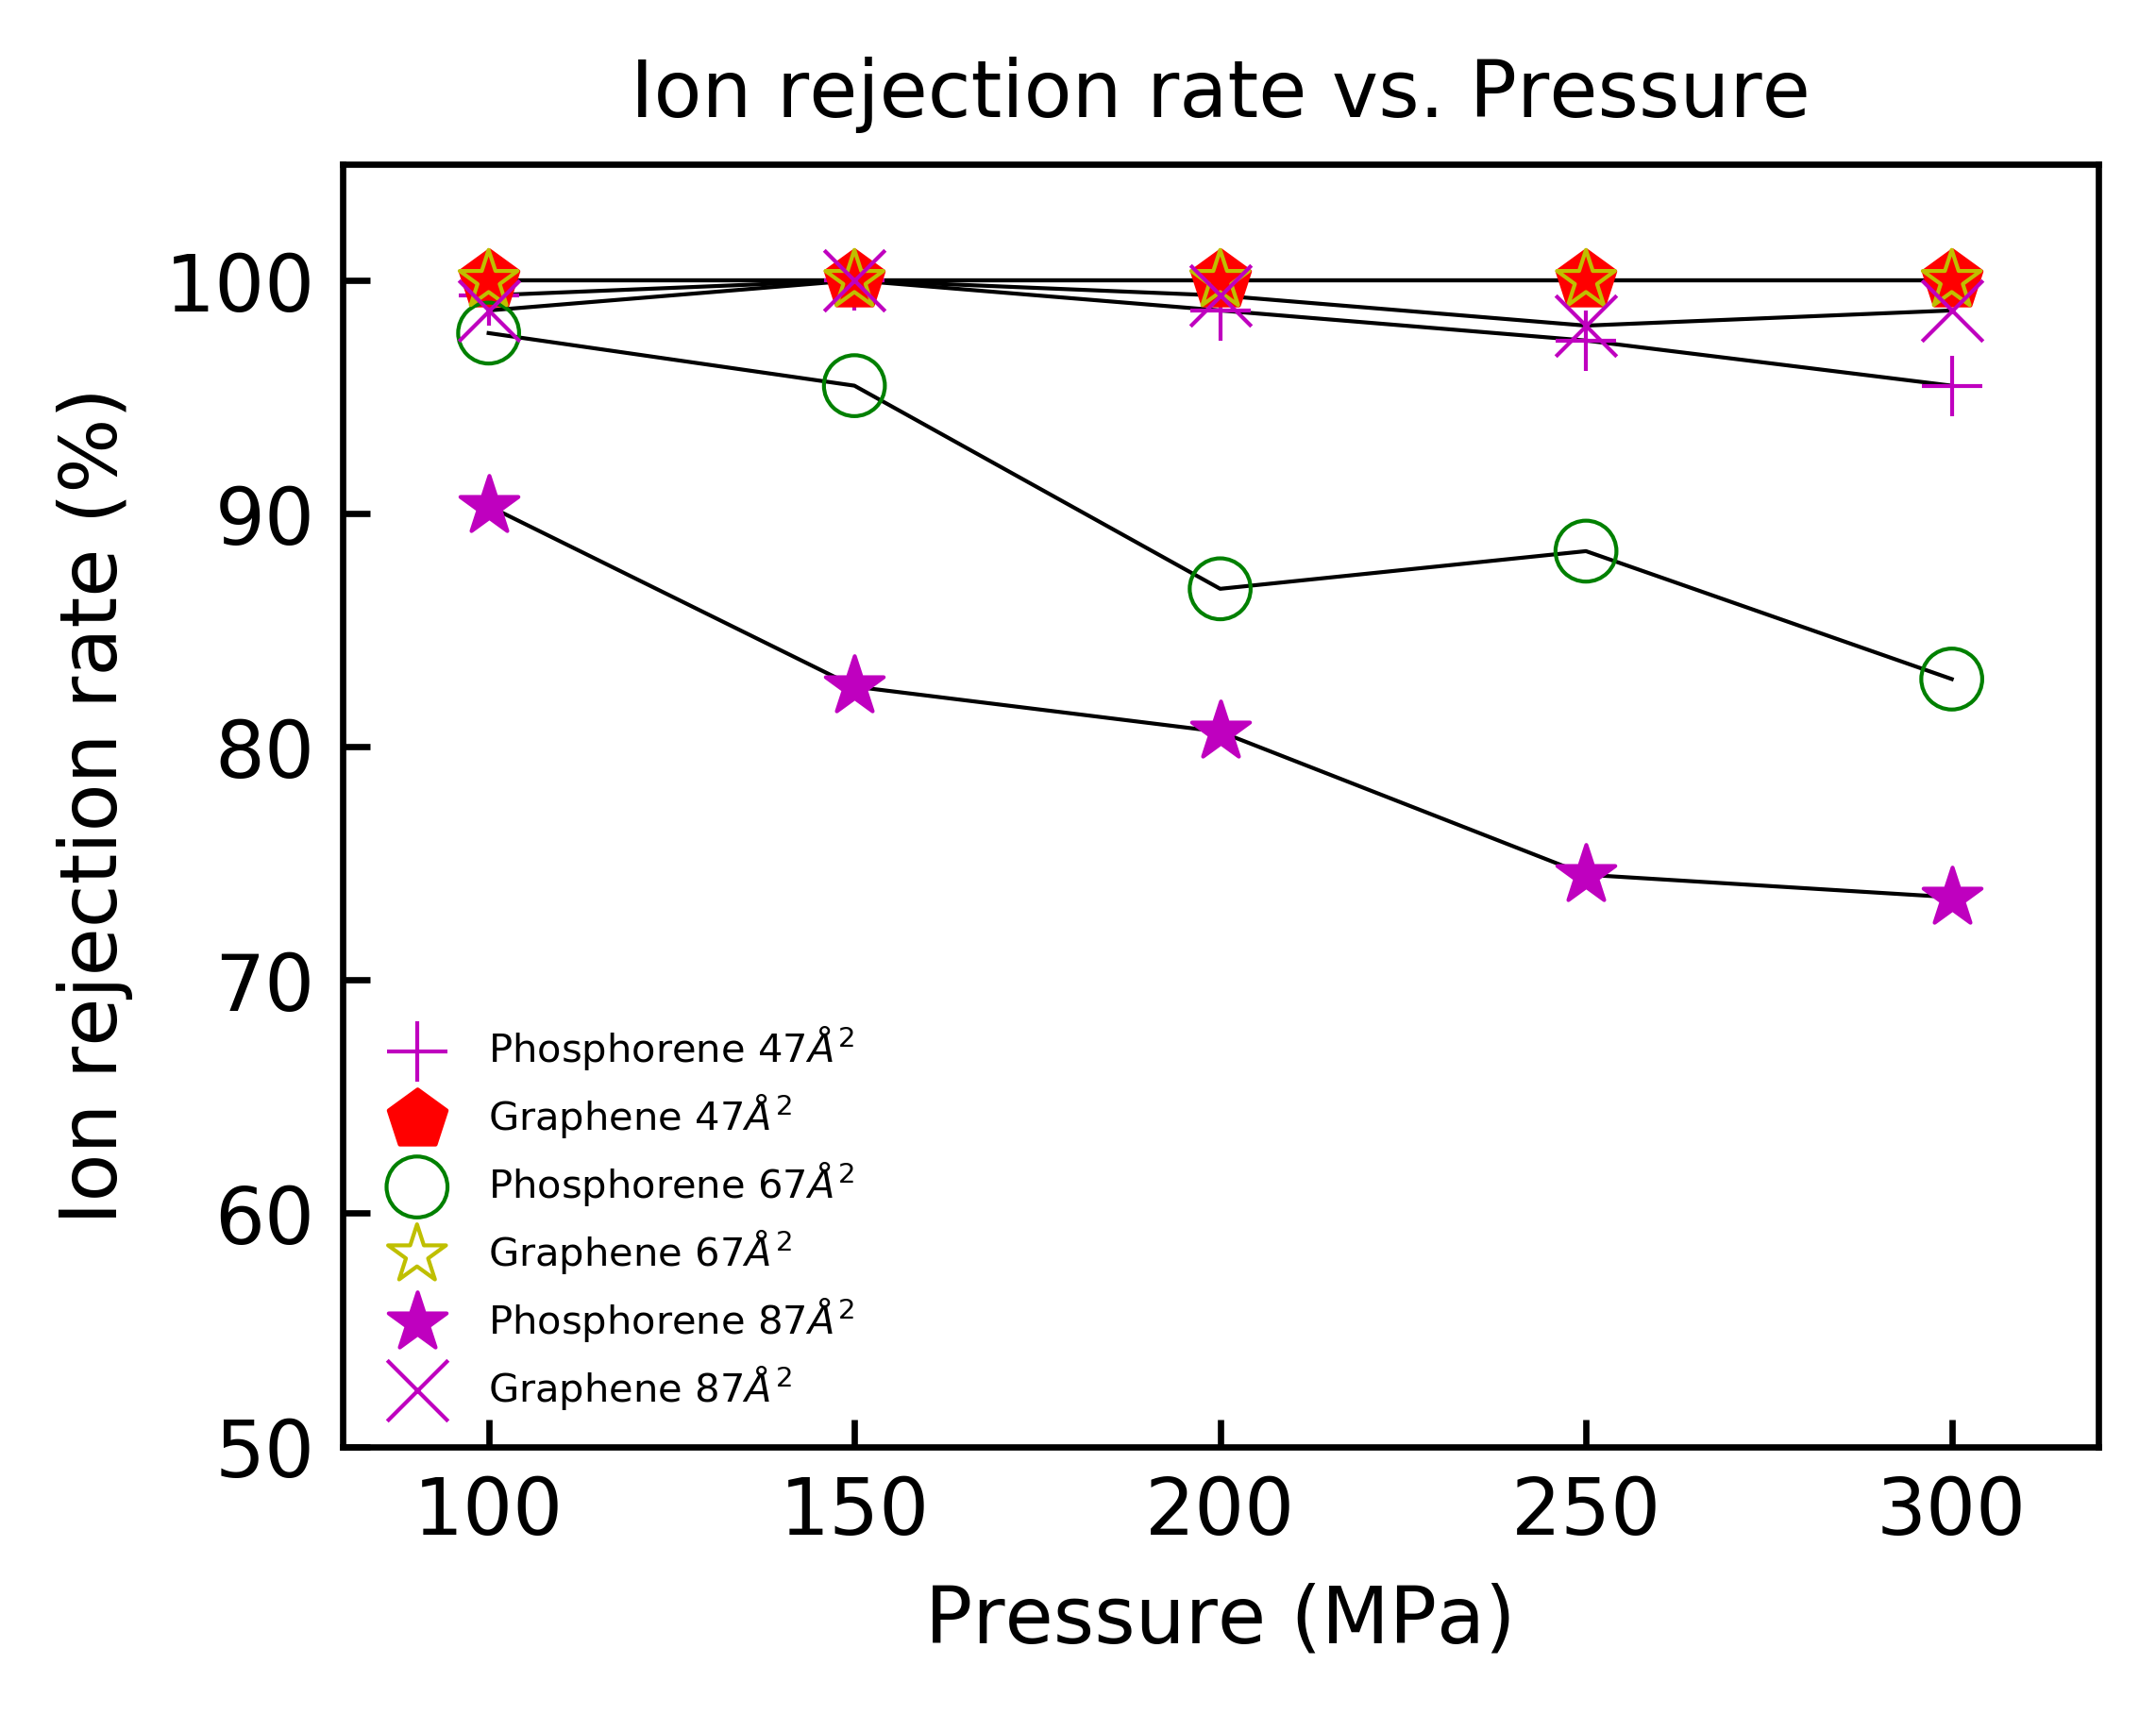

In [396]:
rejection(material_list,data_list, area_list)

In [465]:
def plot_permeation(data, area, material, feature, Press):
    area = str(area)
    Press = str(Press)
    area_dict = {'47': 0,
                 '57': 1,
                 '67': 2,
                 '77': 3,
                 '87': 4}
    Press_dict = {'100': 0,
                  '150': 1,
                  '200': 2,
                  '250': 3,
                  '300': 4}
    area_index = area_dict[area]
    Press_index = Press_dict[Press]
    flux = data[area_index][Press_index,0]
    permeation = flux/Permeation_const[Press_index]
    rej = data[area_index][Press_index,1]
    print(permeation)
    #Unwrap the feautures
    style = feature[0]
    color = feature[1]
    filled = feature[2]
    size = 50
    line = 1
    
    legend_label = r"%s %s$\AA^2$"%(material, str(area))
    
    if filled == 0:
        plt.scatter(permeation,rej, marker = style, facecolors ='none', 
                        edgecolors=color, label = legend_label, 
                        s = size, linewidth = line)
    else:
        plt.scatter(permeation,rej, marker = style, c=color, 
                        label = legend_label, s=size, 
                        linewidth = line)
    

In [479]:
def permeation_rej(material_list, data_list, area_list, Pressure):
    # Check if both list has same length
    if(len(material_list) != len(data_list)):
        print('Material list and data list have different length!')
        return
    #Create figure
    plt.figure(figsize = [4, 3], dpi = 600)
    #Number of materials
    Num = len(material_list)
    #Number of plots
    Num_plots = Num*len(area_list)
    #Make random feature maps
    features = rand_features(Num_plots)
    
    for area_count,area in enumerate(area_list):
        for i in range(Num):
            plot_permeation(data_list[i], area, material_list[i], 
                                features[area_count*Num+i], Pressure)
    plt.legend(frameon = False, loc = 'lower left', fontsize = 5)
    plt.axis([0,100,50,105])
    plt.tick_params(direction = 'in')
    plt.ylabel('Ion rejection rate (%)', fontsize = 10)
    plt.xlabel('Permeation coefficient', fontsize = 10)
    plt.title('Pressure = %s MPa' %str(Pressure),fontsize = 10)
    plt.savefig('Permeation_rejection.jpg', bbox_inches = 'tight')
    return

54.51032209312244
4.7412441794915985
92.95076347168485
18.013930687861887
146.20934115753738
50.755088871312715


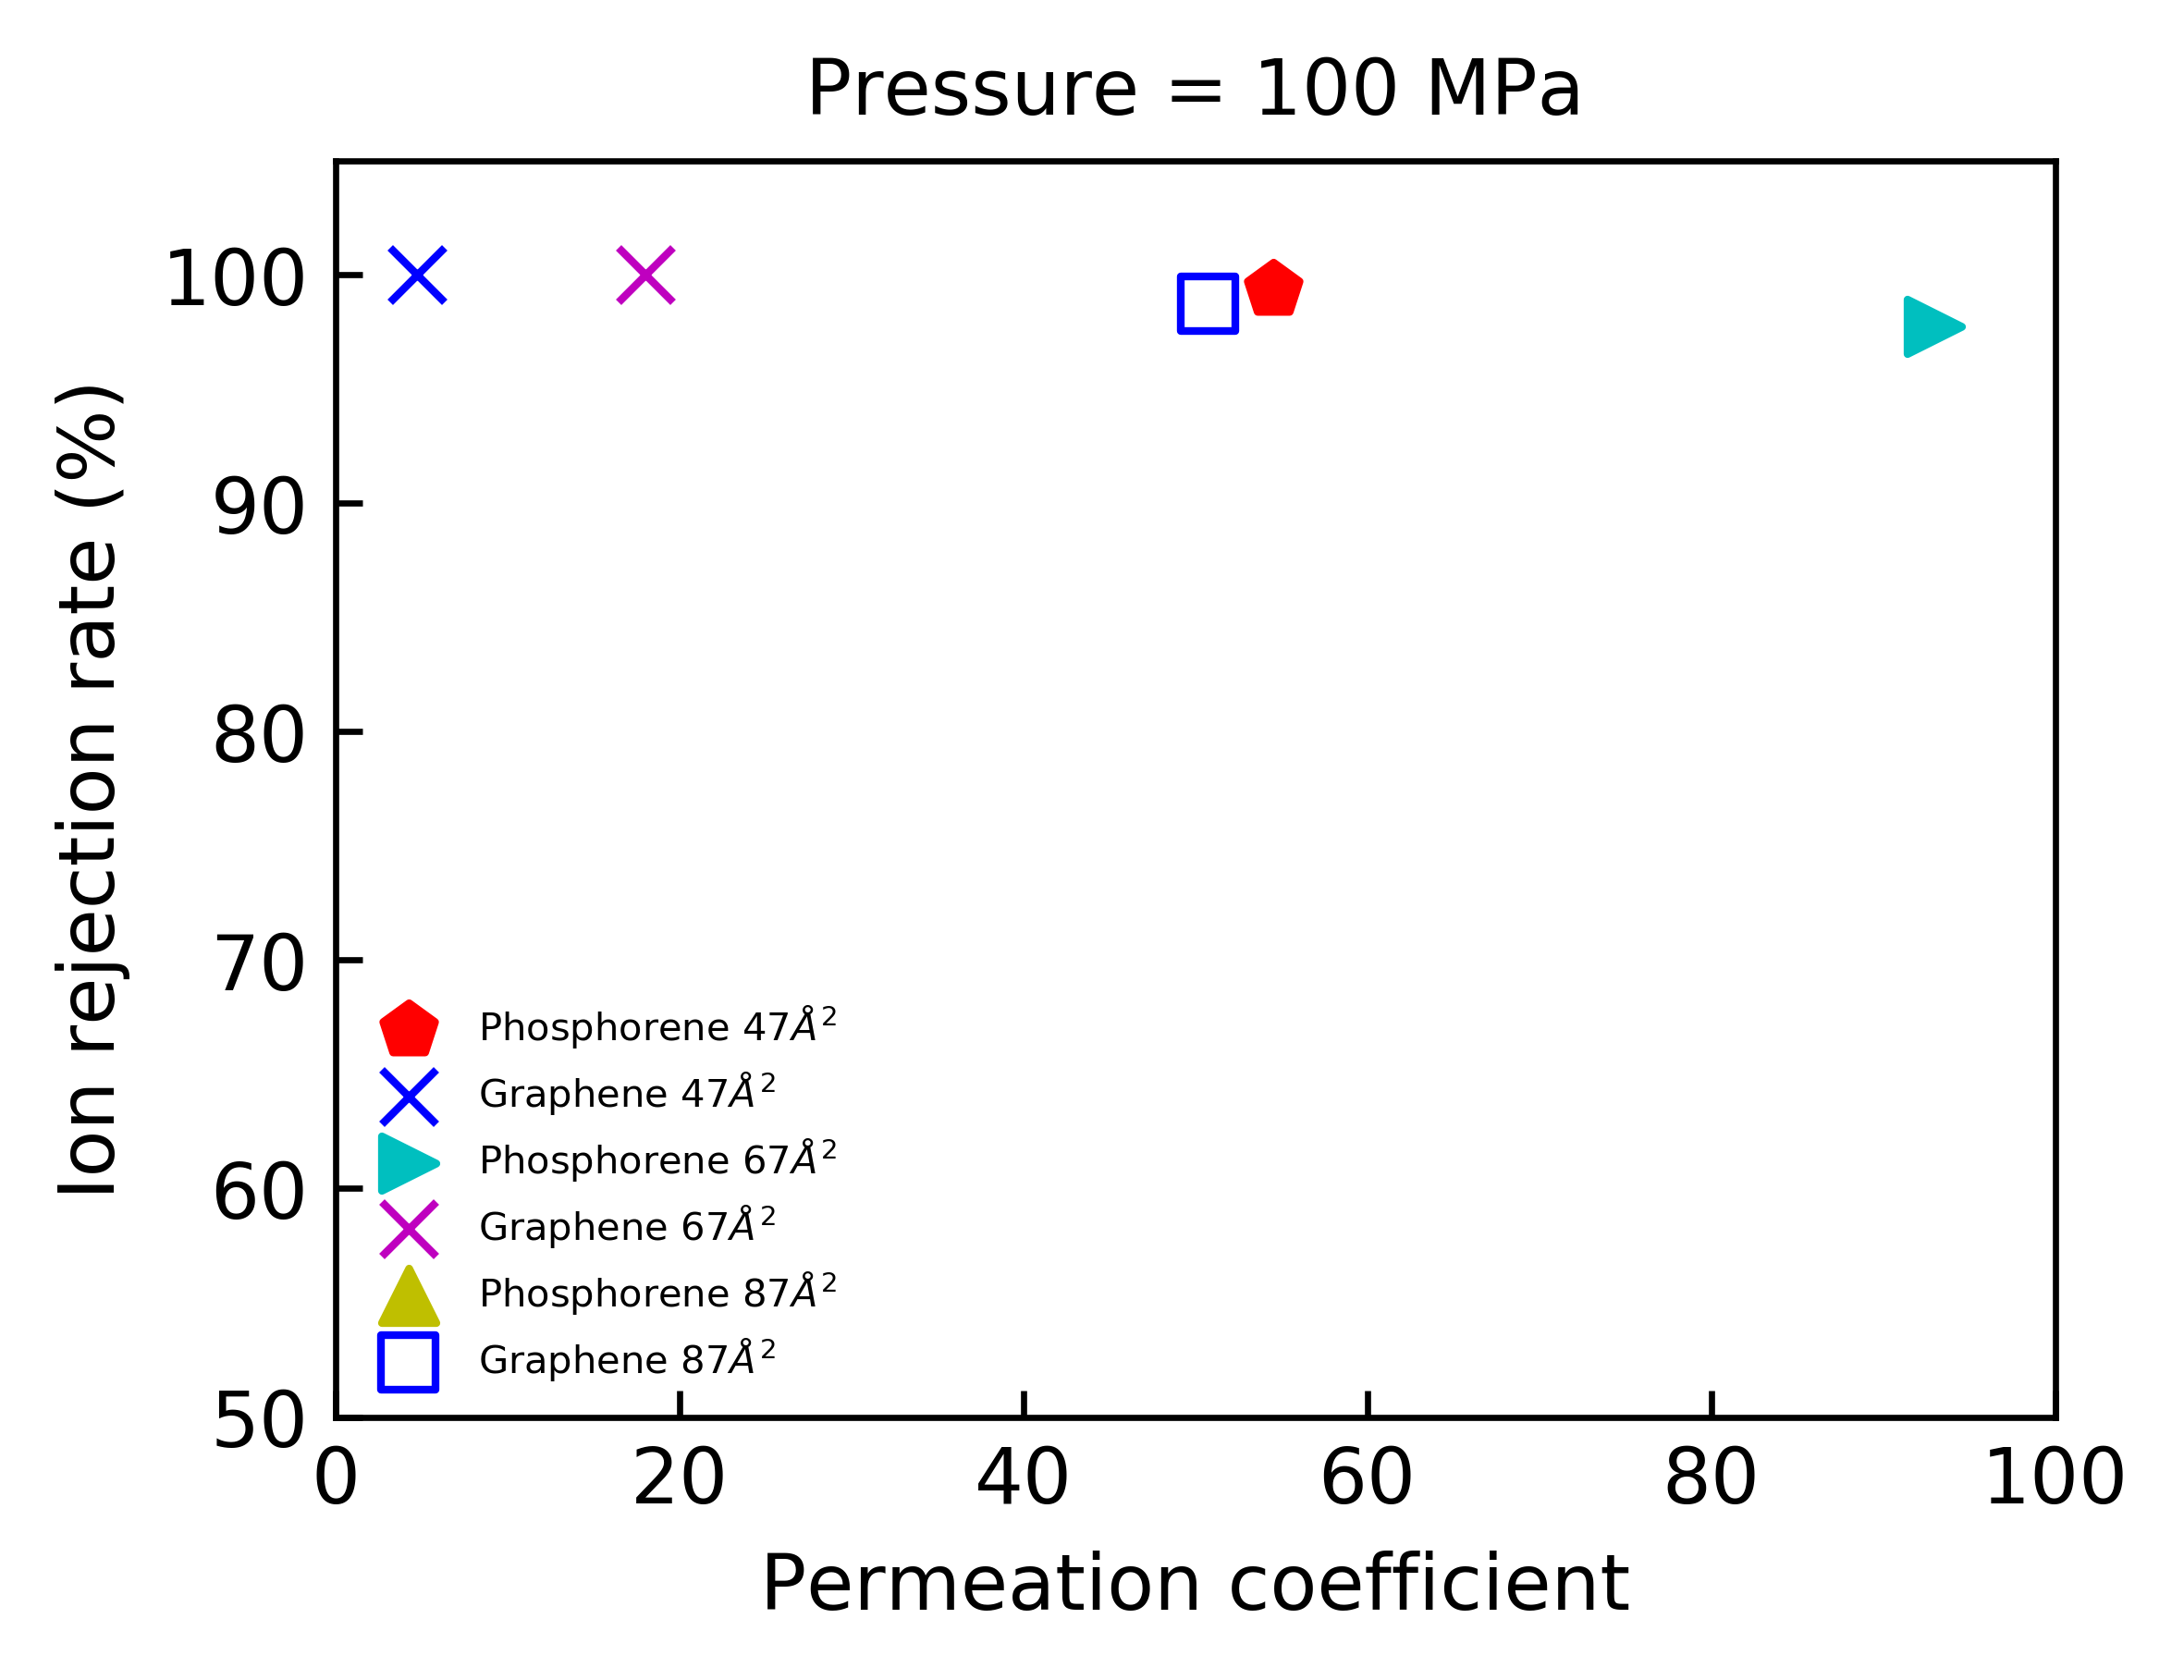

In [481]:
permeation_rej(material_list,data_list,area_list, Pressure = 100)